# Ejercico de estudio

## Importacion y creacion de DataFrames

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [45]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [46]:
train = pd.read_csv("playground-series-s4e6/train.csv")
test = pd.read_csv("playground-series-s4e6/test.csv")
sample = pd.read_csv("playground-series-s4e6/sample_submission.csv")

In [47]:
test_all = test.merge(right=sample, on="id")

## Preprocesamiento

* Análisis de varibles

In [48]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [49]:
train.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

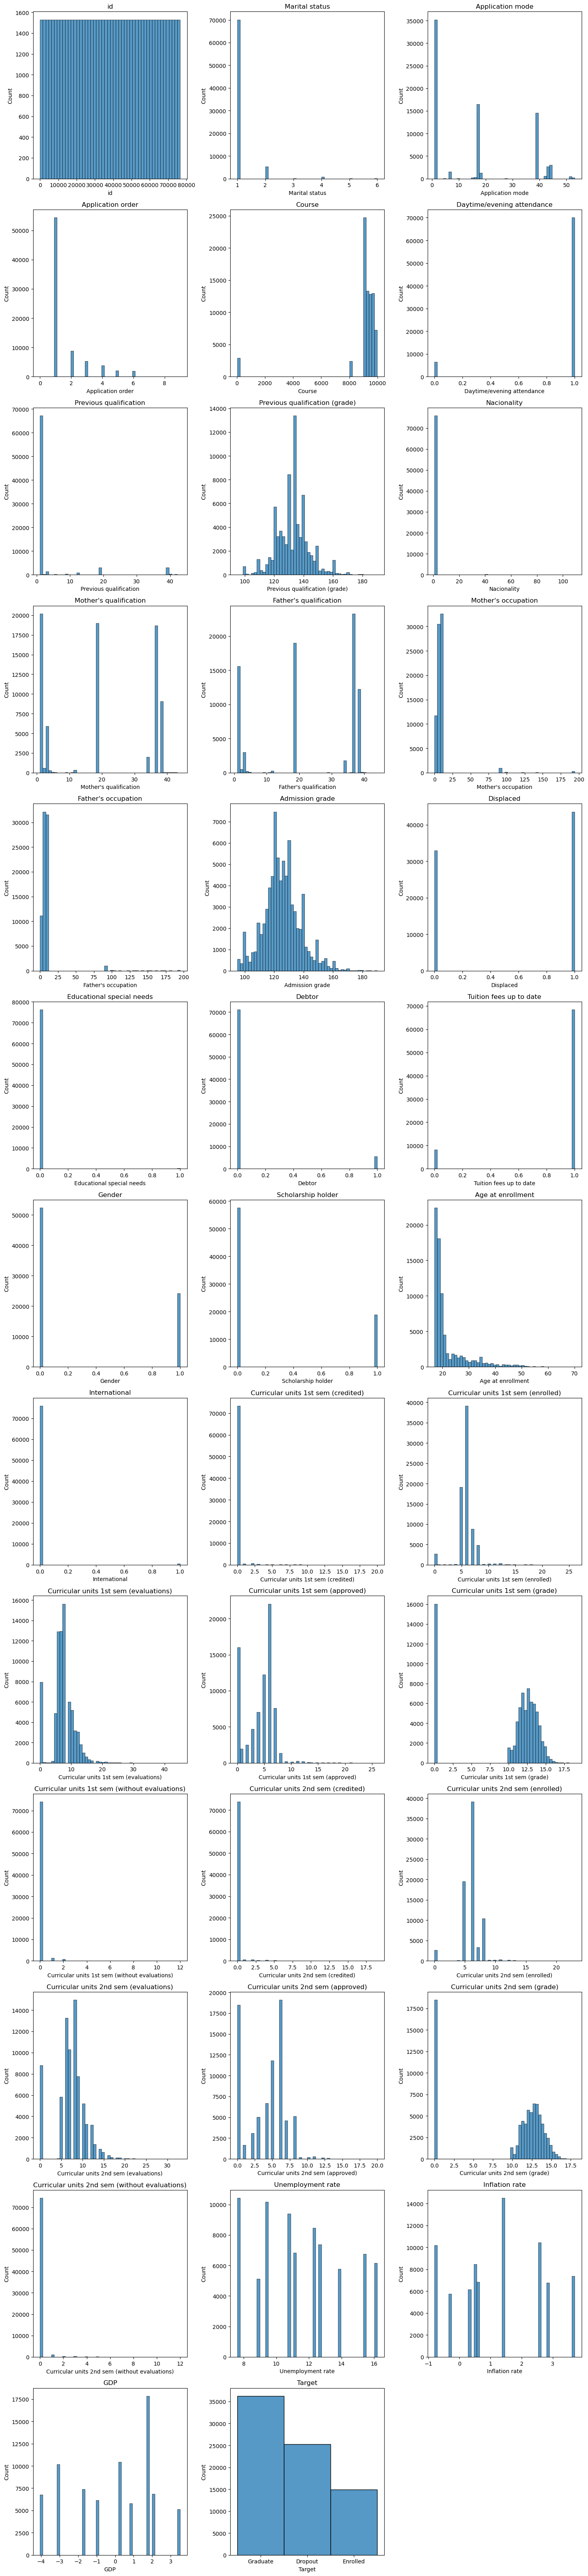

In [50]:
# Copiar el DataFrame y eliminar la columna "BodyFat"
df_graficas_iniciales = train.copy()

# Calcular el número de columnas y filas necesarias
num_columns = len(df_graficas_iniciales.columns)
num_rows = 16
num_cols_per_row = (num_columns + num_rows - 1) // num_rows  # Redondeo hacia arriba

# Ajustar el tamaño de la figura dinámicamente
figsize_x = num_cols_per_row * 5
figsize_y = num_rows * 5

fig, ax = plt.subplots(num_rows, num_cols_per_row, figsize=(figsize_x, figsize_y))


# Iterar sobre las columnas para crear los subgráficos
for idx, col in enumerate(df_graficas_iniciales.columns):
    row = idx // num_cols_per_row
    col_pos = idx % num_cols_per_row
    sns.histplot(df_graficas_iniciales.iloc[:, idx], ax=ax[row][col_pos], bins=50)
    ax[row][col_pos].set_title(df_graficas_iniciales.columns[idx])

# Eliminar los subgráficos vacíos
for i in range(num_columns, num_rows * num_cols_per_row):
    fig.delaxes(ax[i // num_cols_per_row][i % num_cols_per_row])

plt.tight_layout()
plt.show()

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [51]:
train_fil = train.drop(columns=["id", "Course", "Nacionality", "International", "Educational special needs"])
test_fil = test_all.drop(columns=["id", "Course", "Nacionality", "International", "Educational special needs"])

In [52]:
train_fil.columns

Index(['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Admission grade', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment r

In [53]:
train_fil['Age<=24'] = train_fil['Age at enrollment'].apply(lambda x: 1 if x <= 24 else 0)
train_fil.drop(columns='Age at enrollment', inplace=True)



In [54]:
train_fil['Marriage'] = train_fil['Marital status'].apply(lambda x: 1 if x == 2 else 0)
train_fil.drop(columns='Marital status', inplace=True)

In [55]:
cols_numericas = ['Previous qualification (grade)', 'Admission grade',
                    'Curricular units 1st sem (credited)',
                    'Curricular units 1st sem (enrolled)',
                    'Curricular units 1st sem (evaluations)',
                    'Curricular units 1st sem (approved)',
                    'Curricular units 1st sem (grade)',
                    'Curricular units 1st sem (without evaluations)',
                    'Curricular units 2nd sem (credited)',
                    'Curricular units 2nd sem (enrolled)',
                    'Curricular units 2nd sem (evaluations)',
                    'Curricular units 2nd sem (approved)',
                    'Curricular units 2nd sem (grade)',
                    'Curricular units 2nd sem (without evaluations)',
                    'Unemployment rate', 'Inflation rate', 'GDP'
                    ]

train_cat = train_fil.drop(columns=cols_numericas)

cols_categoricas = train_cat.columns

train_num = train_fil.drop(columns=cols_categoricas)

* probamos dummies

In [56]:
train_dummies = pd.get_dummies(train_cat, columns=cols_categoricas)

In [57]:
# train_corr = pd.merge(left=train_dummies, right=train_num)
train_corr = pd.concat([train_dummies, train_num], axis=1)

In [58]:
train_dummies.columns

Index(['Application mode_1', 'Application mode_2', 'Application mode_3',
       'Application mode_4', 'Application mode_5', 'Application mode_7',
       'Application mode_9', 'Application mode_10', 'Application mode_12',
       'Application mode_15',
       ...
       'Gender_1', 'Scholarship holder_0', 'Scholarship holder_1',
       'Target_Dropout', 'Target_Enrolled', 'Target_Graduate', 'Age<=24_0',
       'Age<=24_1', 'Marriage_0', 'Marriage_1'],
      dtype='object', length=240)

In [59]:
corrmat = train_corr.corr()
filtered_corrmat = corrmat[(corrmat['Target_Dropout'] > 0.3) | (corrmat['Target_Enrolled'] > 0.3) | (corrmat['Target_Graduate'] > 0.3)]
filtered_corrmat[['Target_Dropout', 'Target_Enrolled', 'Target_Graduate']].T

,Application mode_39,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Scholarship holder_0,Scholarship holder_1,Target_Dropout,Target_Enrolled,Target_Graduate,Age<=24_0,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
Target_Dropout,0.348956,0.446479,-0.446479,-0.298282,0.316057,-0.316057,1.000000,-0.346147,-0.667323,0.382770,-0.689017,-0.681377,-0.731006,-0.743454
Target_Enrolled,-0.067419,-0.131105,0.131105,-0.029621,0.130278,-0.130278,-0.346147,1.000000,-0.467736,-0.089482,0.014705,0.139845,-0.010648,0.158332
Target_Graduate,-0.275234,-0.316555,0.316555,0.304529,-0.401180,0.401180,-0.667323,-0.467736,1.000000,-0.289576,0.637456,0.530917,0.697141,0.574724


In [60]:
filtered_corrmat

,Application mode_1,Application mode_2,Application mode_3,Application mode_4,Application mode_5,Application mode_7,Application mode_9,Application mode_10,Application mode_12,Application mode_15,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Application mode_39,-0.446978,-0.004948,-0.001749,-0.001749,-0.016327,-0.068382,-0.001749,-0.011475,-0.001749,-0.023694,...,0.023375,-0.029299,-0.074033,-0.068879,-0.340769,-0.331810,0.037895,0.026123,0.039187,-0.086575
Tuition fees up to date_0,-0.184774,-0.003528,-0.001247,-0.001247,-0.009123,0.089555,-0.001247,-0.001025,-0.001247,0.010013,...,0.053063,-0.013725,-0.092254,-0.105356,-0.370150,-0.381380,0.046862,0.001790,0.005714,-0.057133
Tuition fees up to date_1,0.184774,0.003528,0.001247,0.001247,0.009123,-0.089555,0.001247,0.001025,0.001247,-0.010013,...,-0.053063,0.013725,0.092254,0.105356,0.370150,0.381380,-0.046862,-0.001790,-0.005714,0.057133
Gender_0,0.176577,-0.001302,0.002456,0.002456,0.008740,-0.019664,-0.005321,0.006620,0.002456,-0.003571,...,-0.006011,-0.001023,0.207906,0.071752,0.339734,0.299345,-0.049950,-0.003329,-0.009016,0.040390
Scholarship holder_0,-0.179325,0.002900,0.002073,-0.006305,0.001369,0.074896,0.002073,0.005927,0.002073,0.014431,...,0.051322,0.035398,-0.133448,-0.047350,-0.355532,-0.295095,0.055386,-0.072654,0.040151,-0.074781
Scholarship holder_1,0.179325,-0.002900,-0.002073,0.006305,-0.001369,-0.074896,-0.002073,-0.005927,-0.002073,-0.014431,...,-0.051322,-0.035398,0.133448,0.047350,0.355532,0.295095,-0.055386,0.072654,-0.040151,0.074781
Target_Dropout,-0.280394,-0.004469,-0.002540,-0.002540,-0.008871,0.117462,0.005144,-0.004941,-0.002540,-0.011089,...,0.047391,-0.027872,-0.246683,-0.315589,-0.731006,-0.743454,0.053712,0.010459,0.038080,-0.097085
Target_Enrolled,0.014816,-0.001812,-0.001781,-0.001781,0.010775,-0.046758,-0.001781,0.000841,-0.001781,0.015031,...,0.023654,-0.018873,-0.060466,0.268875,-0.010648,0.158332,0.034896,-0.059967,-0.006960,-0.007394
Target_Graduate,0.252400,0.005649,0.003807,0.003807,-0.000196,-0.073544,-0.003433,0.003988,0.003807,-0.001485,...,-0.063426,0.041241,0.280403,0.083875,0.697141,0.574724,-0.078305,0.037750,-0.030351,0.097335
Age<=24_0,-0.459171,0.010257,-0.001885,-0.001885,-0.017592,0.214629,0.006933,-0.011019,-0.001885,-0.013783,...,0.048848,0.100200,-0.025799,-0.066305,-0.337316,-0.355280,0.054886,0.018534,0.048674,-0.108127


* voy a trabajar con lo que me ha dado a ver que sacamos

<Axes: >

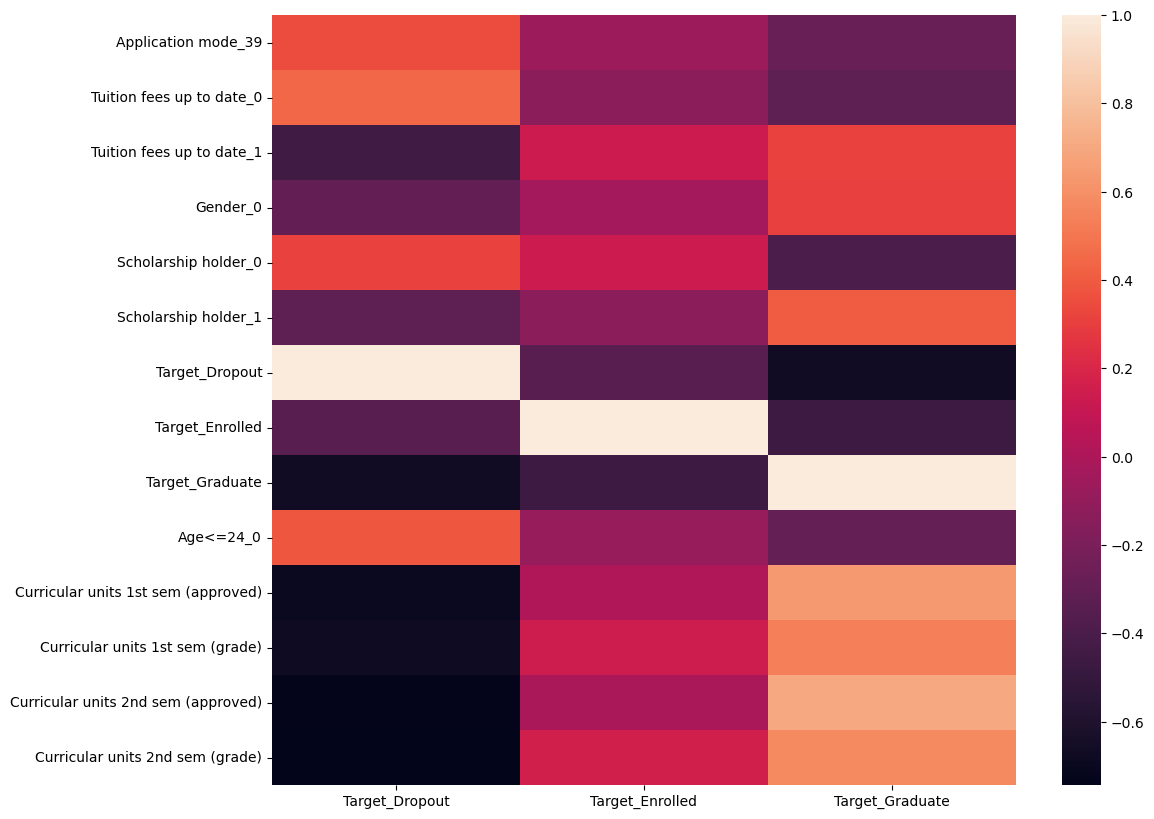

In [61]:
fcorrmat = filtered_corrmat[['Target_Dropout', 'Target_Enrolled', 'Target_Graduate']]
plt.figure(figsize=(12, 10))
sns.heatmap(fcorrmat, fmt=".2f")

In [62]:
filtered_corrmat.columns

Index(['Application mode_1', 'Application mode_2', 'Application mode_3',
       'Application mode_4', 'Application mode_5', 'Application mode_7',
       'Application mode_9', 'Application mode_10', 'Application mode_12',
       'Application mode_15',
       ...
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object', length=257)

In [63]:
columnas_sel = [
    col.split("_")[0] if "_" in col else col  # Parte antes del primer guion bajo si existe
    for col in fcorrmat.drop(columns=['Target_Dropout', 'Target_Enrolled', 'Target_Graduate']).T.columns
]

# Agregar las columnas que no contienen '_'
columnas_sel.extend([col for col in fcorrmat.T.columns if "_" not in col])

# Eliminar duplicados (si es necesario)
columnas_sel = list(dict.fromkeys(columnas_sel))

# Crear un nuevo DataFrame con las columnas seleccionadas de train_corr
train_final = pd.concat([train_cat, train_num], axis=1)[columnas_sel]

# Mostrar las columnas del DataFrame final
print("Columnas seleccionadas en train_final:")
print(train_final.columns)

Columnas seleccionadas en train_final:
Index(['Application mode', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Target', 'Age<=24',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')


In [105]:
def tranformacion1(df_transformar):

    df_transformar['Age<=24'] = df_transformar['Age at enrollment'].apply(lambda x: 1 if x <= 24 else 0)
    df_transformar.drop(columns='Age at enrollment', inplace=True)

    dt_transformar =df_transformar[['Application mode', 'Tuition fees up to date', 'Gender',
                                    'Scholarship holder', 'Age<=24',
                                    'Curricular units 1st sem (approved)',
                                    'Curricular units 1st sem (grade)',
                                    'Curricular units 2nd sem (approved)',
                                    'Curricular units 2nd sem (grade)']]
    

    return train_final

## Tras el preprocesamiento

In [64]:
X=train_final.drop(columns='Target')
Y=train_final['Target']
print(len(X), len(Y))

76518 76518


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
# hago el preprocesamiento en el X_train
scaler=StandardScaler()
scaler.fit(X_train)
X_train[:]=scaler.transform(X_train)
X_test[:]=scaler.transform(X_test)

In [67]:
clf=LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [68]:
yhat_train=clf.predict(X_train)
accuracy_score(y_train,yhat_train)

0.7993759597477701

In [69]:
yhat_test=clf.predict(X_test)
accuracy_score(y_test,yhat_test)

0.7986800836382645

## Una vez tengamos un modelo, hay que repetir el preprocesamiento a test (al conjunto que sirve para hacer una submission)

In [108]:
test=pd.read_csv("playground-series-s4e6/test.csv")
submission=pd.read_csv("playground-series-s4e6/sample_submission.csv")


In [109]:
test.head().T

,0,1,2,3,4
id,76518.00,76519.000000,76520.00,76521.00,76522.000000
Marital status,1.00,1.000000,1.00,1.00,1.000000
Application mode,1.00,1.000000,1.00,44.00,39.000000
Application order,1.00,1.000000,1.00,1.00,1.000000
Course,9500.00,9238.000000,9238.00,9147.00,9670.000000
Daytime/evening attendance,1.00,1.000000,1.00,1.00,1.000000
Previous qualification,1.00,1.000000,1.00,39.00,1.000000
Previous qualification (grade),141.00,128.000000,118.00,130.00,110.000000
Nacionality,1.00,1.000000,1.00,1.00,1.000000
Mother's qualification,3.00,1.000000,1.00,1.00,1.000000


In [110]:
X_submission = tranformacion1(test)

In [111]:
# NO HAGO FIT CON TEST, APLICO LA MISMA TRANSFORMACIÓN
X_submission[:]=scaler.transform(X_submission)
yhat_submission=clf.predict(X_submission)

In [112]:
yhat_submission

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [113]:
submission.Target=yhat_submission
submission.to_csv("playground-series-s4e6/modelo_prueba01.csv", index=False)